Rozwiązanie dla równania z tłumieniem:
Eq(x(t), C1*exp(t*(-gamma + sqrt(gamma**2 - 4*k*m))/(2*m)) + C2*exp(-t*(gamma + sqrt(gamma**2 - 4*k*m))/(2*m)))

Rozwiązanie dla równania z tłumieniem i wymuszeniem:
Eq(x(t), C1*exp(t*(-gamma + sqrt(gamma**2 - 4*k*m))/(2*m)) + C2*exp(-t*(gamma + sqrt(gamma**2 - 4*k*m))/(2*m)) + F0*gamma*omega*sin(omega*t)/(gamma**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) + F0*k*cos(omega*t)/(gamma**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) - F0*m*omega**2*cos(omega*t)/(gamma**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))


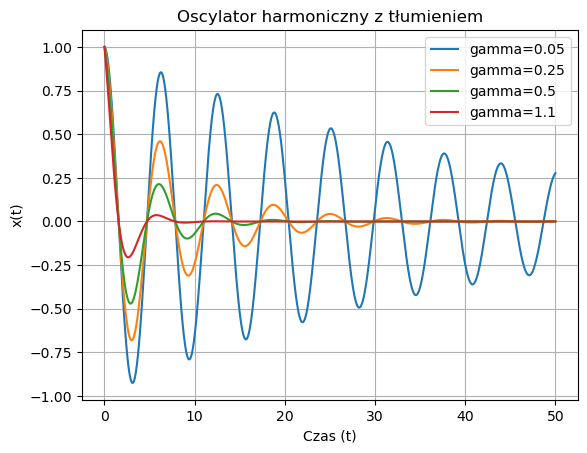

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, dsolve, cos, sin, solve

# Definiowanie symboli
x = Function('x')
t = symbols('t')
omega = symbols('omega', real=True, positive=True)  # Częstość wymuszenia
gamma = symbols('gamma', real=True, positive=True)  # Tłumienie
F0 = symbols('F0', real=True)  # Amplituda wymuszenia
m = symbols('m', real=True, positive=True)  # Masa
k = symbols('k', real=True, positive=True)  # Stała sprężystości

# Równanie oscylatora harmonicznego z tłumieniem
oscillator_eq_damping = Eq(m * x(t).diff(t, t) + gamma * x(t).diff(t) + k * x(t), 0)

# Równanie oscylatora harmonicznego z tłumieniem i wymuszeniem kosinusoidalnym
oscillator_eq_forcing = Eq(m * x(t).diff(t, t) + gamma * x(t).diff(t) + k * x(t), F0 * cos(omega * t))

# Rozwiązywanie równań symbolicznie
solution_damping = dsolve(oscillator_eq_damping, x(t))
solution_forcing = dsolve(oscillator_eq_forcing, x(t))

# Wyświetlanie rozwiązań symbolicznych
print("Rozwiązanie dla równania z tłumieniem:")
print(solution_damping)
print("\nRozwiązanie dla równania z tłumieniem i wymuszeniem:")
print(solution_forcing)

# Wykresy dla równania z tłumieniem
m_val = 1
k_val = 1
F0_val = 1
t_vals = np.linspace(0, 50, 1000)

gamma_values = [0.05, 0.25, 0.5, 1.1]  # Kilka wartości tłumienia
for gamma_val in gamma_values:
    omega_0 = np.sqrt(k_val / m_val)
    gamma_over_2m = gamma_val / (2 * m_val)
    A = 1  # Zakładamy początkową amplitudę 1
    phi = 0  # Faza początkowa

    # Rozwiązanie analityczne dla tłumienia (bez wymuszenia)
    x_t = A * np.exp(-gamma_over_2m * t_vals) * np.cos(omega_0 * t_vals - phi)

    plt.plot(t_vals, x_t, label=f'gamma={gamma_val}')

plt.title("Oscylator harmoniczny z tłumieniem")
plt.xlabel("Czas (t)")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

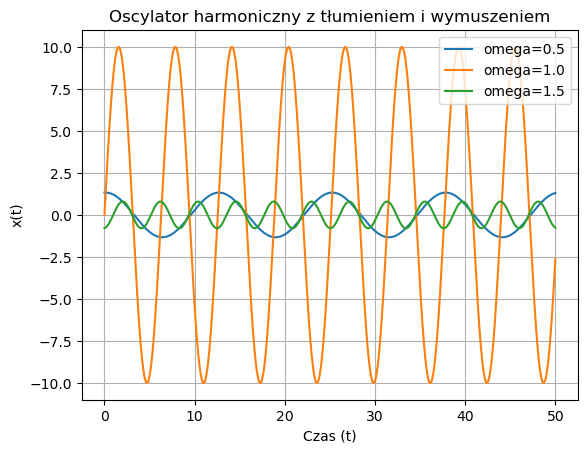

In [2]:
# Wykresy dla równania z tłumieniem i wymuszeniem
omega_values = [0.5, 1.0, 1.5]  # Kilka wartości częstości wymuszenia
for omega_val in omega_values:
    gamma_val = 0.1
    omega_0 = np.sqrt(k_val / m_val)
    gamma_over_2m = gamma_val / (2 * m_val)

    # Rozwiązanie analityczne dla tłumienia z wymuszeniem
    # x(t) = C1 * exp(-gamma*t/2m) * cos(omega_0 * t) + (F0/m) * (cos(omega*t) / (k - m*omega^2 + i*gamma*omega))
    A = F0_val / (k_val - m_val * omega_val**2 + 1j * gamma_val * omega_val)
    x_t_forcing = np.real(A * np.exp(1j * omega_val * t_vals))

    plt.plot(t_vals, x_t_forcing, label=f'omega={omega_val}')

plt.title("Oscylator harmoniczny z tłumieniem i wymuszeniem")
plt.xlabel("Czas (t)")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()
